In [1]:
import os
import pandas as pd
import scipy.spatial as spatial

In [2]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.neighbors import KDTree
from scipy.spatial.distance import cdist


import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import random

import warnings
warnings.filterwarnings("ignore")

In [3]:
show_averages = pd.read_csv('../output/show_averages.csv')

In [4]:
show_averages.head()

acousticness  danceability    energy          host  instrumentalness  \
0      0.397903      0.593984  0.612476  100-elements          0.143169   
1      0.411760      0.568864  0.477757    150session          0.506222   
2      0.222235      0.649801  0.616469         239ef          0.651471   
3      0.125524      0.628543  0.734706           404          0.490622   
4      0.241618      0.543225  0.644732   80srampwalk          0.399130   

        key  liveness   loudness      mode  speechiness       tempo   valence  
0  5.325365  0.248400  -9.030980  0.585152     0.232456  105.198983  0.550846  
1  5.308251  0.181875 -13.244073  0.608438     0.082675  121.093263  0.419212  
2  5.836919  0.168529 -11.052283  0.545171     0.084075  120.727100  0.394593  
3  5.783984  0.206325  -8.187795  0.607497     0.127118  128.200799  0.351460  
4  5.609361  0.191930 -10.484908  0.598856     0.071090  125.016547  0.486557

In [7]:
show_averages.dropna(inplace=True)
show_average_data = show_averages.drop(['host'], axis=1)
#show_average_data = (show_average_data - show_average_data.mean()) / (show_average_data.max() - show_average_data.min())

In [8]:
show_average_data.head()

acousticness  danceability    energy  instrumentalness       key  liveness  \
0      0.397903      0.593984  0.612476          0.143169  5.325365  0.248400   
1      0.411760      0.568864  0.477757          0.506222  5.308251  0.181875   
2      0.222235      0.649801  0.616469          0.651471  5.836919  0.168529   
3      0.125524      0.628543  0.734706          0.490622  5.783984  0.206325   
4      0.241618      0.543225  0.644732          0.399130  5.609361  0.191930   

    loudness      mode  speechiness       tempo   valence  
0  -9.030980  0.585152     0.232456  105.198983  0.550846  
1 -13.244073  0.608438     0.082675  121.093263  0.419212  
2 -11.052283  0.545171     0.084075  120.727100  0.394593  
3  -8.187795  0.607497     0.127118  128.200799  0.351460  
4 -10.484908  0.598856     0.071090  125.016547  0.486557

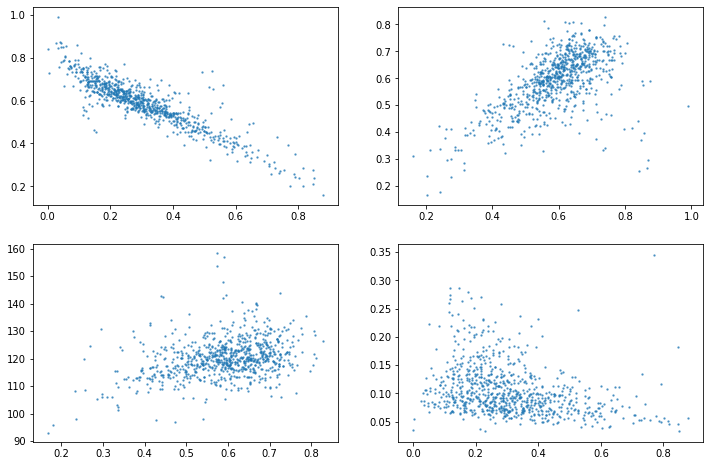

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
ax[0][0].scatter(show_average_data['acousticness'], show_average_data['energy'], s=2, alpha=0.6)
ax[0][1].scatter(show_average_data['energy'], show_average_data['danceability'], s=2, alpha=0.6)
ax[1][0].scatter(show_average_data['danceability'], show_average_data['tempo'], s=2, alpha=0.6)
ax[1][1].scatter(show_average_data['acousticness'], show_average_data['speechiness'], s=2, alpha=0.6)

In [14]:
kmeans_model = KMeans(n_clusters=15, max_iter=10000).fit(show_average_data)

In [15]:
show_averages['cluster'] = kmeans_model.labels_

In [16]:
clusters = np.unique(kmeans_model.labels_)
index = np.random.choice(clusters.shape[0], 5, replace=False)   # select 5 random clusters
clustered_data = show_averages[show_averages['cluster'].isin(index)]

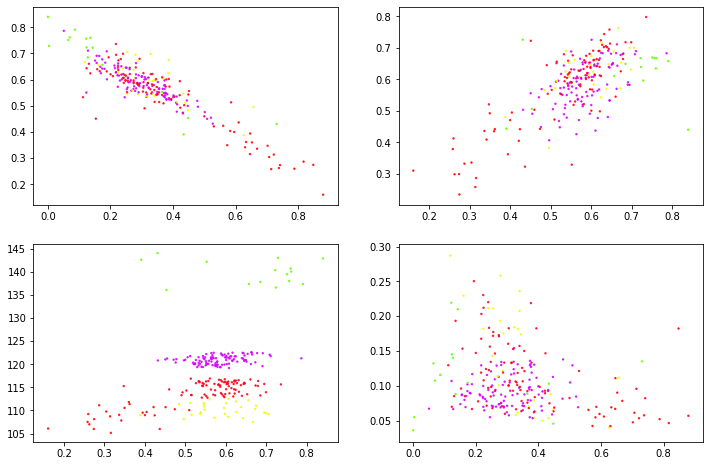

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
ax[0][0].scatter(clustered_data['acousticness'], clustered_data['energy'], s=2, 
            c=clustered_data['cluster'], cmap='hsv', alpha=0.8)
ax[0][1].scatter(clustered_data['energy'], clustered_data['danceability'], s=2, 
            c=clustered_data['cluster'], cmap='hsv', alpha=0.8)
ax[1][0].scatter(clustered_data['energy'], clustered_data['tempo'], s=2, 
            c=clustered_data['cluster'], cmap='hsv', alpha=0.8)
ax[1][1].scatter(clustered_data['acousticness'], clustered_data['speechiness'], s=2, 
            c=clustered_data['cluster'], cmap='hsv', alpha=0.8)

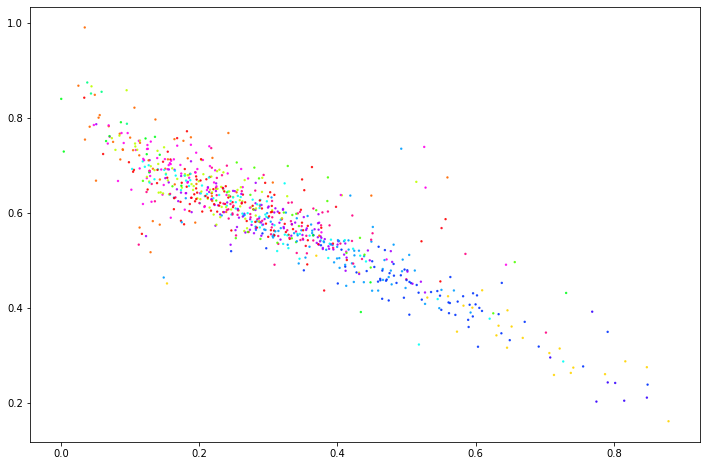

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(show_averages['acousticness'], show_averages['energy'], s=2, 
            c=show_averages['cluster'], cmap='hsv', alpha=0.8)

In [19]:
# Here, lets take an episode I like and find which cluster it belongs to. Then lets calculate a KDTree for that 
# particular cluster and find nearest neighbour shows.

# Alternatively, I could give it any 'row' of 11 dimensions (this could be a show, host or even just a single song),
# find the closest centroid to it and THEN do my KDTree. To start lets just do the above.

artist = 'tiffany-calver'

show_of_interest = show_averages[(show_averages['host'] == artist)]
cluster_value = show_of_interest.cluster
cluster_rows = show_averages[show_averages['cluster'] == int(cluster_value)]

In [20]:
D = cdist(show_of_interest.drop(columns=['host']), cluster_rows.drop(columns=['host']))

In [21]:
tree = spatial.KDTree(cluster_rows.drop(columns=['host']))

In [22]:
nearest_neighbours = tree.query(show_of_interest.drop(columns=['host']), k=5)

In [24]:
print(f'You enjoyed {artist}!')
print('We think you might also enjoy:\n')
nn_indexes = nearest_neighbours[1][0]
for i in range(len(nn_indexes)):
    if nearest_neighbours[0][0][i] != 0:
        nearby_host = cluster_rows.iloc[nearest_neighbours[1][0][i]]['host']
        print(f'    {nearby_host} ')

You enjoyed tiffany-calver!
We think you might also enjoy:

    siobhan-bell 
    hollow-points 
    come-thru 
    mina 
